In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# tendência -> direção
# sazonalidade -> recorrência de oscilações
# resíduo -> variação "aleatória" do sinal

In [3]:
dados_path ='https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv'

dados = pd.read_csv(dados_path)

In [4]:
print(dados.info())

dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None


,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [5]:
dados.index = pd.to_datetime(dados.DATE, format='%m-%d-%Y')

In [6]:
dados.drop(columns=['DATE'], inplace=True)

In [7]:
display(dados.head())

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [8]:
dados.loc['2000-01-01']

Value    102.2301
Name: 2000-01-01 00:00:00, dtype: float64

In [10]:
dados.loc[dados.index > '2000-01-01']

,Value
DATE,
2000-02-01,94.2989
2000-03-01,88.0927
2000-04-01,81.4425
2000-05-01,84.4552
2000-06-01,91.0406
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


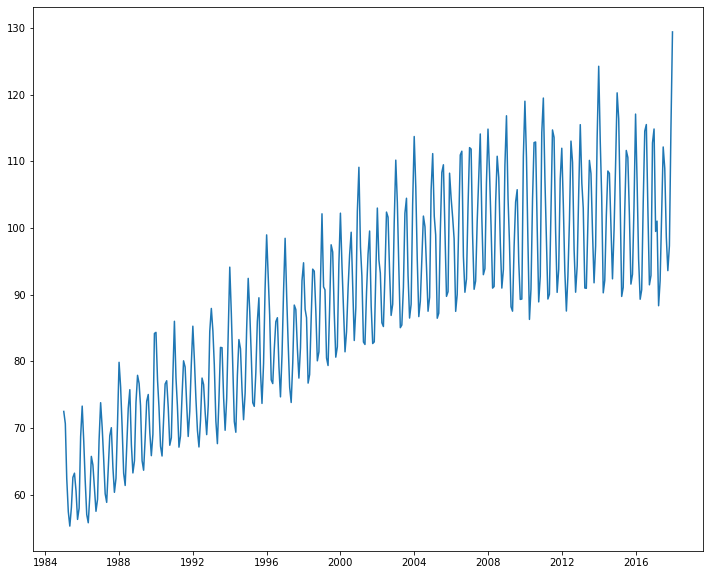

In [11]:
plt.figure(figsize=(12, 10))

plt.plot(dados.index, dados.Value)

plt.show()

In [12]:
result = seasonal_decompose(dados)

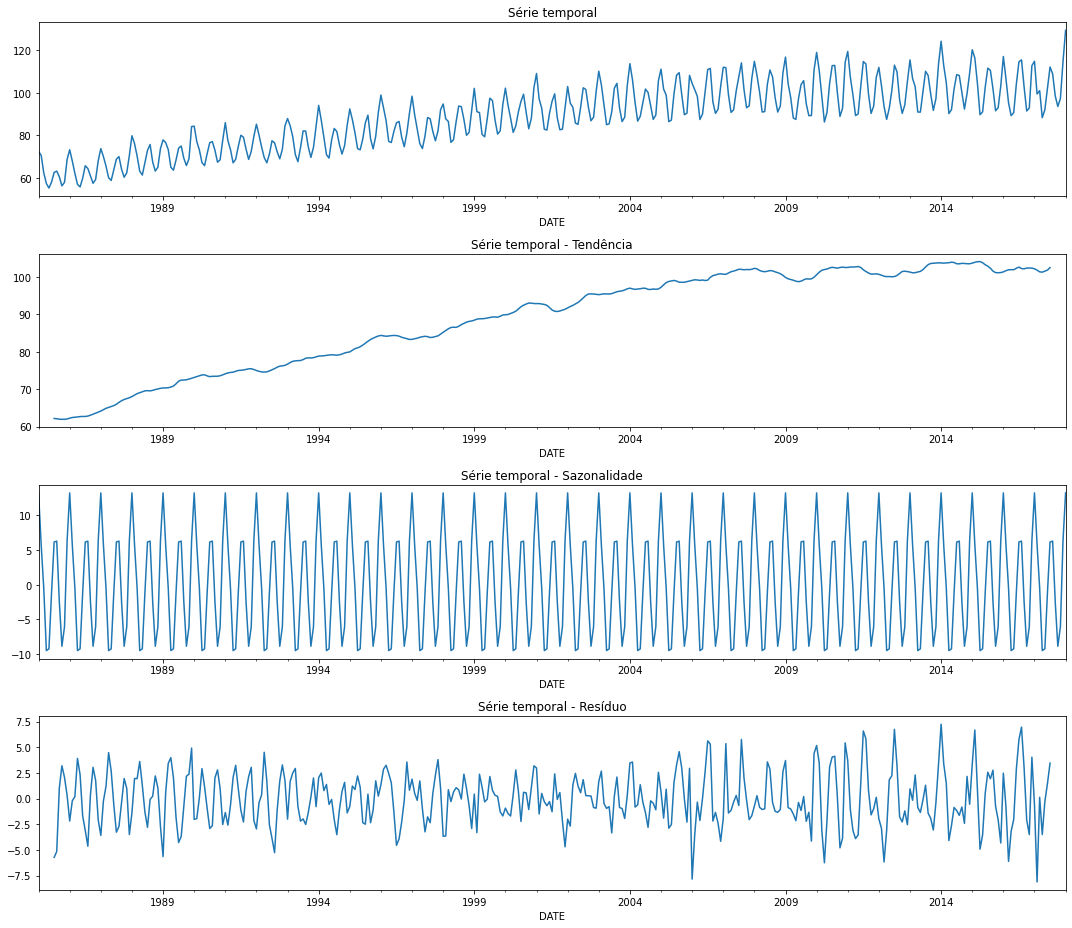

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 13))

result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

ax1.set_title('Série temporal')
ax2.set_title('Série temporal - Tendência')
ax3.set_title('Série temporal - Sazonalidade')
ax4.set_title('Série temporal - Resíduo')

plt.tight_layout()

# Séries estacionárias e não estacionárias

- Estacionária: evolução temporal constante

- Não estacionária: evolução temporal variável

- Teste ADF -> verificar se uma série temporal é estacionária ou não

- H0 = hipótese nula (não é estacionária)
- H1 = hipótese alternativa (é estacionária)

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
result_adfuller = adfuller(dados.Value)

In [26]:
print(result_adfuller)

(-2.2569903500472432, 0.18621469116586814, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627156)


In [27]:
print('Teste ADF')

print(f'Teste estatístico: {result_adfuller[0]}')
print(f'P-value: {result_adfuller[1]}')
print('\n')

print('Valores críticos:')
for key,value in result_adfuller[4].items():
    print(f'{key}: {value}')

Teste ADF
Teste estatístico: -2.2569903500472432
P-value: 0.18621469116586814


Valores críticos:
1%: -3.4476305904172904
5%: -2.869155980820355
10%: -2.570827146203181


Não é estacionária!

# Transformada logarítmica para transformar em série estacionária

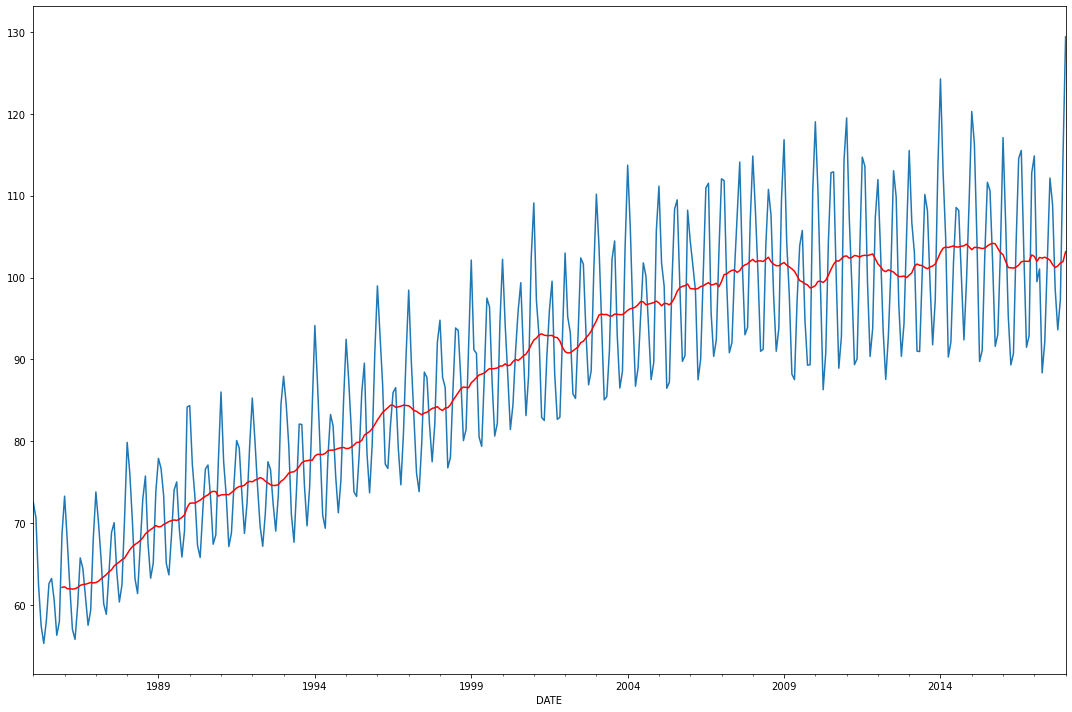

In [34]:
# Rolling = calcula estatísticas com base em intervalos no df. Neste caso, média móvel

ma = dados.rolling(12). mean()

fig, ax= plt.subplots(figsize=(15,10))

dados.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')

plt.tight_layout()
plt.show()

In [35]:
dados_log = np.log(dados)
ma_log = dados_log.rolling(12).mean()

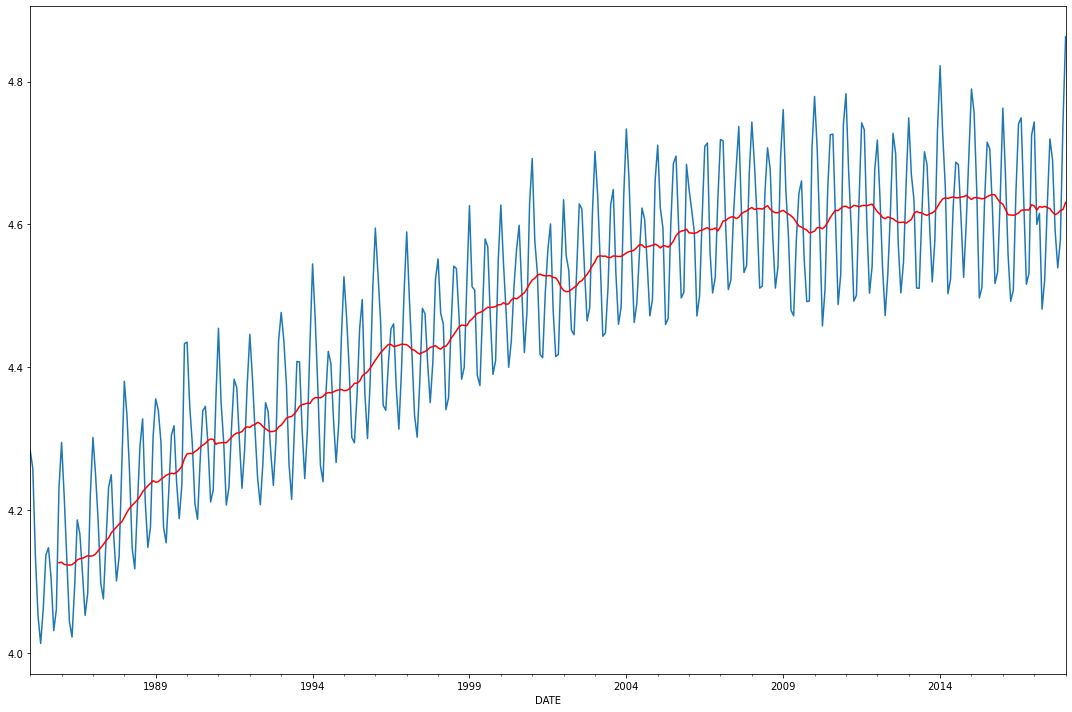

In [36]:
fig, ax= plt.subplots(figsize=(15,10))

dados_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')

plt.tight_layout()
plt.show()

In [50]:
dados_log_subt = dados_log - ma_log
ma_subt = dados_log_subt.rolling(12).mean()
std_subt = dados_log.rolling(12).std()
dados_log_subt.dropna(inplace=True)

display(dados_log_subt)
display(ma_subt)
display(std_subt)

,Value
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
...,...
2017-09-01,-0.022477
2017-10-01,-0.076443
2017-11-01,-0.041347


,Value
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
...,...
2017-09-01,-0.008406
2017-10-01,-0.006096
2017-11-01,-0.002142


,Value
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
...,...
2017-09-01,0.090198
2017-10-01,0.088161
2017-11-01,0.085080


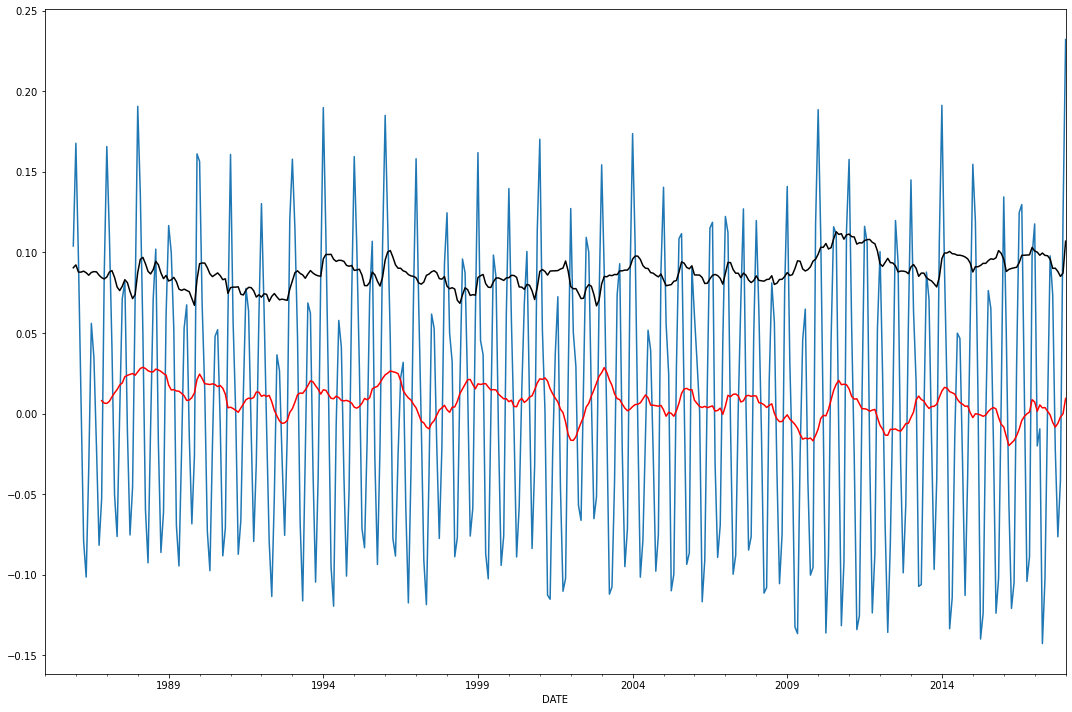

In [51]:
fig, ax= plt.subplots(figsize=(15,10))

dados_log_subt.plot(ax=ax, legend=False)
ma_subt.plot(ax=ax, legend=False, color='r')
std_subt.plot(ax=ax, legend=False, color='black')

plt.tight_layout()
plt.show()

In [52]:
result_adfuller_log = adfuller(dados_log_subt.Value)

In [56]:
print('Teste ADF')

print(f'Teste estatístico: {result_adfuller_log[0]}')
print(f'P-value: {result_adfuller_log[1]}')
print('\n')

print('Valores críticos:')
for key,value in result_adfuller_log[4].items():
    print(f'{key}: {value}')

if(result_adfuller_log[1] < result_adfuller_log[4]['5%']):
    print('H0 nula confirmada, não é estacionária')
else:
    print('H1 alternativa confirmada, é estacionária')

Teste ADF
Teste estatístico: -5.211586185365429
P-value: 8.325639759946488e-06


Valores críticos:
1%: -3.448147967010838
5%: -2.8693833397824413
10%: -2.5709483564645725
H1 alternativa confirmada, é estacionária


## Diferenciação/derivada

In [59]:
dados_diff = dados_log_subt.diff(1)
ma_diff = dados_diff.rolling(12).mean()
std_diff = dados_diff.rolling(12).std()
dados_diff.dropna(inplace=True)

dados_diff

,Value
DATE,
1986-01-01,0.063763
1986-02-01,-0.072095
1986-03-01,-0.088300
1986-04-01,-0.086444
1986-05-01,-0.022357
...,...
2017-09-01,-0.096055
2017-10-01,-0.053966
2017-11-01,0.035095


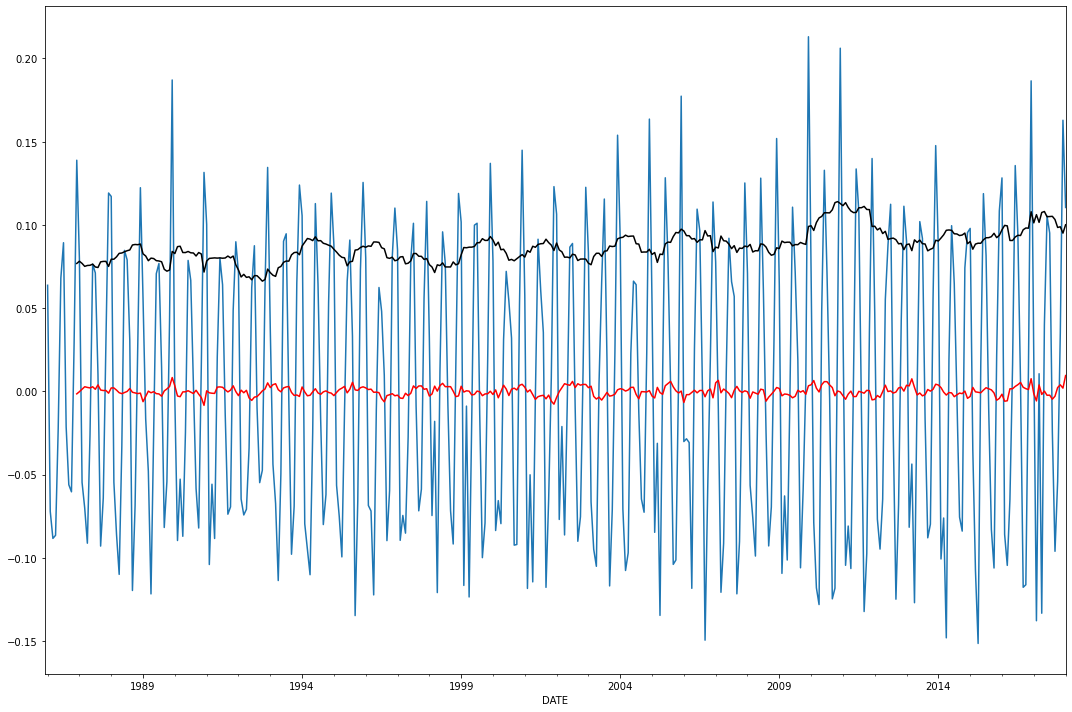

In [62]:
fig, ax= plt.subplots(figsize=(15,10))

dados_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='black')

plt.tight_layout()
plt.show()

In [63]:
result_adfuller_diff = adfuller(dados_diff.Value)

In [64]:
print('Teste ADF')

print(f'Teste estatístico: {result_adfuller_diff[0]}')
print(f'P-value: {result_adfuller_diff[1]}')
print('\n')

print('Valores críticos:')
for key,value in result_adfuller_diff[4].items():
    print(f'{key}: {value}')

if(result_adfuller_diff[1] < result_adfuller_diff[4]['5%']):
    print('H0 nula confirmada, não é estacionária')
else:
    print('H1 alternativa confirmada, é estacionária')

Teste ADF
Teste estatístico: -7.651129568145196
P-value: 1.7881267354355122e-11


Valores críticos:
1%: -3.448294490928673
5%: -2.869447722240253
10%: -2.570982681065269
H1 alternativa confirmada, é estacionária
